In [ ]:
!pip install mmap_ninja

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for mmap-ninja: filename=mmap_ninja-0.2.3-py3-none-any.whl size=6828 sha256=5c7f37d18c2faeed7662dd94d7bad14c95676549eb8aeafd5fa38398398a75b9
  Stored in directory: /root/.cache/pip/wheels/ae/9e/f5/8502777f83d7259b21081cf26a7efb4c58b06b2454a3d97dfa
Successfully built mmap-ninja


In [ ]:
!wget https://jsoncompare.org/LearningContainer/SampleFiles/Video/MP4/Sample-MP4-Video-File-for-Testing.mp4

--2022-06-18 07:03:19--  https://jsoncompare.org/LearningContainer/SampleFiles/Video/MP4/Sample-MP4-Video-File-for-Testing.mp4
Resolving jsoncompare.org (jsoncompare.org)... 172.67.133.119, 104.21.5.129, 2606:4700:3031::6815:581, ...
Connecting to jsoncompare.org (jsoncompare.org)|172.67.133.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17839845 (17M) [video/mp4]
Saving to: ‘Sample-MP4-Video-File-for-Testing.mp4’

Sample-MP4-Video-Fi 100%[===================>]  17.01M  38.7MB/s    in 0.4s    

2022-06-18 07:03:20 (38.7 MB/s) - ‘Sample-MP4-Video-File-for-Testing.mp4’ saved [17839845/17839845]



In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def generate_frames(video_path):
  cap = cv2.VideoCapture(video_path)
  success, img = cap.read()
  fno = 0
  while success:
    # read next frame
    success, img = cap.read()
    if success:
      yield img

In [ ]:
video_path = './Sample-MP4-Video-File-for-Testing.mp4'

In [ ]:
img = next(generate_frames(video_path))

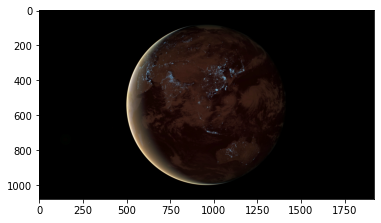

In [ ]:
plt.imshow(img)

In [ ]:
from mmap_ninja.ragged import RaggedMmap

In [ ]:
RaggedMmap.from_generator(
    out_dir='video_mmap',
    sample_generator=generate_frames(video_path),
    batch_size=64,
    verbose=True
)

900it [00:29, 30.44it/s]


In [ ]:
video_mmap = RaggedMmap('video_mmap')

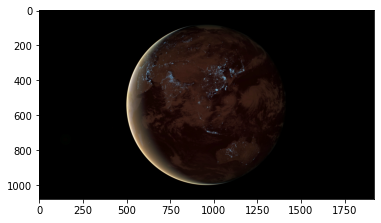

In [ ]:
plt.imshow(video_mmap[0])

In [ ]:
!du -sh video_mmap

5.3G	video_mmap


In [ ]:
!ls -lht ./Sample-MP4-Video-File-for-Testing.mp4

-rw-r--r-- 1 root root 18M Aug 24  2021 ./Sample-MP4-Video-File-for-Testing.mp4


In [ ]:
from tqdm import tqdm

for img in tqdm(video_mmap):
  pass

100%|██████████| 900/900 [00:00<00:00, 17102.08it/s]


In [ ]:
for x, y in zip(video_mmap, video_mmap):
  pass